## **Name: Nhi Luu**
## **Date: 11/12/2022**
## **Project 5**: **Wolfram Alpha API**

APP NAME: nluu1@umbc.edu

APPID: A65YLR-TXJWYE4486

USAGE TYPE: Personal/Non-commercial Only

Tutorial Link: https://towardsdatascience.com/build-your-next-project-with-wolfram-alpha-api-and-python-51c2c361d8b9

# Part I: Follow tutorial

## Setting Up

In [ ]:
from pprint import pprint
import requests
import os
import urllib.parse

appid = 'A65YLR-TXJWYE4486'

query = urllib.parse.quote_plus("lifespan of a mosquito")
query_url = f"http://api.wolframalpha.com/v2/query?" \
             f"appid={appid}" \
             f"&input={query}" \
             f"&format=plaintext" \
             f"&output=json"

r = requests.get(query_url).json()

data = r["queryresult"]["pods"][1]["subpods"][0]
datasource = ", ".join(data["datasources"]["datasource"])
microsource = data["microsources"]["microsource"]
plaintext = data["plaintext"]

print(f"Result: '{plaintext}' from {datasource} ({microsource}).")
# Result: '(9.2 to 11, 52 to 60) days' from AmazingNumbers, TheWikimediaFoundationIncWikipedia (SpeciesData).


Result: '(9.2 to 11, 52 to 60) days' from AmazingNumbers, TheWikimediaFoundationIncWikipedia (SpeciesData).


### Doing Math

In [ ]:
equation = "7 + 2x = 12 - 3x"
query = urllib.parse.quote_plus(f"solve {equation}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&includepodid=Result" \
            f"&output=json"

r = requests.get(query_url).json()

data = r["queryresult"]["pods"][0]["subpods"][0]
plaintext = data["plaintext"]

print(f"Result of {equation} is '{plaintext}'.")

Result of 7 + 2x = 12 - 3x is 'x = 1'.


In [ ]:
equation = "7 + 2x = 12 - 3x"
query = urllib.parse.quote_plus(f"solve {equation}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&scanner=Solve" \
            f"&podstate=Result__Step-by-step+solution" \
            "&format=plaintext" \
            f"&output=json"

r = requests.get(query_url).json()

data = r["queryresult"]["pods"][0]["subpods"]
result = data[0]["plaintext"]
steps = data[1]["plaintext"]

print(f"Result of {equation} is '{result}'.\n")
print(f"Possible steps to solution:\n\n{steps}")

Result of 7 + 2x = 12 - 3x is 'x = 1'.

Possible steps to solution:

Solve for x:
2 x + 7 = -3 x + 12
Add 3 x to both sides:
3 x + 2 x + 7 = (3 x - 3 x) + 12
3 x - 3 x = 0:
3 x + 2 x + 7 = 12
Grouping like terms, 3 x + 2 x + 7 = (2 x + 3 x) + 7:
((2 x + 3 x) + 7) = 12
2 x + 3 x = 5 x:
5 x + 7 = 12
Subtract 7 from both sides:
5 x + (7 - 7) = 12 - 7
7 - 7 = 0:
5 x = 12 - 7
12 - 7 = 5:
5 x = 5
Divide both sides of 5 x = 5 by 5:
(5 x)/5 = 5/5
5/5 = 1:
x = 5/5
5/5 = 1:
Answer: | 
 | x = 1


## Rendering Mathematical Markdown

In [ ]:
equation = "7 + 2x = 12 - 3x"
query = urllib.parse.quote_plus(f"solve {equation}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&scanner=Solve" \
            f"&podstate=Result__Step-by-step+solution" \
            "&format=mathml" \
            f"&output=json"

r = requests.get(query_url).json()

data = r["queryresult"]["pods"][0]["subpods"]
result = data[0]["mathml"]
steps = data[1]["mathml"]

print(f"MathML result of {equation} is:\n")
print(f"{result}")
print(f"Possible steps to solution:\n\n{steps}")

MathML result of 7 + 2x = 12 - 3x is:

<math xmlns='http://www.w3.org/1998/Math/MathML'
    mathematica:form='StandardForm'
    xmlns:mathematica='http://www.wolfram.com/XML/'>
 <mrow>
  <mi>x</mi>
  <mo>=</mo>
  <mn>1</mn>
 </mrow>
</math>
Possible steps to solution:

<math xmlns='http://www.w3.org/1998/Math/MathML'
    mathematica:form='StandardForm'
    xmlns:mathematica='http://www.wolfram.com/XML/'>
 <mtable displaystyle='true'>
  <mtr>
   <mtd>
    <mtable displaystyle='true'>
     <mtr>
      <mtd>
       <mrow>
        <mrow>
         <mrow>
          <mtext>Solve for </mtext>
          <mi>x</mi>
         </mrow>
        </mrow>
        <mo>:</mo>
       </mrow>
      </mtd>
     </mtr>
     <mtr>
      <mtd>
       <mrow>
        <mrow>
         <mrow>
          <mrow>
           <mn>2</mn>
           <mo>&#8290;</mo>
           <mi>x</mi>
          </mrow>
          <mo>+</mo>
          <mn>7</mn>
         </mrow>
         <mo>=</mo>
         <mrow>
          <mrow>
        

## Solving Boolean Algebra

In [ ]:
formula = "((P AND (Q IMPLIES R)) OR S) AND T"
query = urllib.parse.quote_plus(f"solve {formula}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input=solve {formula}" \
            f"&output=json" \
            f"&includepodid=Input" \
            f"&includepodid=MinimalForms" \
            f"&includepodid=TruthDensity"

r = requests.get(query_url).json()

pods = r["queryresult"]["pods"]
expression = pods[0]["subpods"][0]["plaintext"]
min_forms = "\n".join(pods[1]["subpods"][0]["plaintext"].split("\n")[:-1])
truth_density = pods[2]["subpods"][0]["plaintext"].split("=")

print(f"Expression {expression}: \n")
print(f"{min_forms}\n")
print(f"Truth density equals {truth_density[0]} which is {truth_density[1]}")

Expression ((P ∧ (Q implies R)) ∨ S) ∧ T: 

DNF | (P ∧ ¬Q ∧ T) ∨ (P ∧ R ∧ T) ∨ (S ∧ T)
CNF | (P ∨ S) ∧ (¬Q ∨ R ∨ S) ∧ T
ANF | (P ∧ T) ⊻ (S ∧ T) ⊻ (P ∧ Q ∧ T) ⊻ (P ∧ S ∧ T) ⊻ (P ∧ Q ∧ R ∧ T) ⊻ (P ∧ Q ∧ S ∧ T) ⊻ (P ∧ Q ∧ R ∧ S ∧ T)
NOR | (P ⊽ S) ⊽ (¬Q ⊽ R ⊽ S) ⊽ ¬T
NAND | (P ⊼ ¬Q ⊼ T) ⊼ (P ⊼ R ⊼ T) ⊼ (S ⊼ T)
AND | ¬(¬P ∧ ¬S) ∧ ¬(Q ∧ ¬R ∧ ¬S) ∧ T
OR | ¬(¬P ∨ Q ∨ ¬T) ∨ ¬(¬P ∨ ¬R ∨ ¬T) ∨ ¬(¬S ∨ ¬T)

Truth density equals 11/32 which is 34.375%


## Rendering & Downloading Plots

In [ ]:
function = "sin x cos y"
query = f"plot {function}"
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&output=json" \
            f"&includepodid=3DPlot" \
            f"&includepodid=ContourPlot"

r = requests.get(query_url).json()

pods = r["queryresult"]["pods"]
plot_3d_url = pods[0]["subpods"][0]["img"]["src"]
plot_contour_url = pods[1]["subpods"][0]["img"]["src"]

img_name = "3d_plot.jpg"
img_data = requests.get(plot_3d_url).content
with open(img_name, 'wb') as handler:
    handler.write(img_data)
    print(f"3D Plot Image Saved to {img_name}.")

3D Plot Image Saved to 3d_plot.jpg.


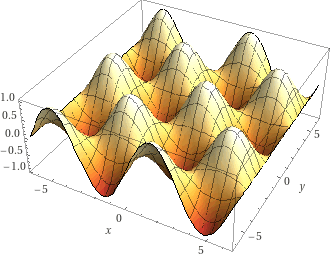

In [ ]:
#https://stackoverflow.com/questions/64258200/how-to-show-image-from-folder-in-google-colab
from IPython import display
display.Image("/content/3d_plot.jpg")

## DNA sequence

In [ ]:
query = "AAGCTAGCTAGC"
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&scanner=Genome" \
            f"&output=json" \
            f"&includepodid=Length" \
            f"&includepodid=AminoAcidSequence" \
            f"&includepodid=MeltingTemperature" \

r = requests.get(query_url).json()

pods = r["queryresult"]["pods"]

length = {
    "title": pods[0]["title"],
    "value": pods[0]["subpods"][0]["plaintext"]
}
amino_sequence = {
    "title": pods[1]["title"],
    "value": pods[1]["subpods"][0]["plaintext"].replace(") ", ")\n")
}
melting_temp = {
    "title": pods[2]["title"],
    "value": pods[2]["subpods"][0]["plaintext"]
}

print(f"{length['title']}: {length['value']}\n")
print(f"{amino_sequence['title']}:\n {amino_sequence['value']}\n")
print(f"{melting_temp['title']}: {melting_temp['value']}")

Length: 12 base pairs

Amino acid sequence:
 (5'-3' frame 1)
| AAG | CUA | GCU | AGC
↓ | ↓ | ↓ | ↓
Lys | Leu | Ala | Ser

Oligonucleotide melting temperature: 48.5 °C (degrees Celsius)
(under standard PCR conditions)


## Natural Language (Spoken) Answers

In [ ]:
question = "what is the most spoken language in the world?"
query_url = f"http://api.wolframalpha.com/v1/spoken?" \
            f"appid={appid}" \
            f"&i={question}" \

r = requests.get(query_url)

print(r.text)


The most spoken language by total number of speakers is English. The total number of English speakers is about 1.27 billion people


## Chatting with Conversation API

In [ ]:
question = "Where are Falkland Islands?"
location = "47.01,16.93"
query_url = f"http://api.wolframalpha.com/v1/conversation.jsp?" \
            f"appid={appid}" \
            f"&geolocation={appid}" \
            f"&i={question}" \

r = requests.get(query_url).json()
answer = r["result"]
conversation_id = r["conversationID"]
host = r["host"]

print(f"{question}: '{answer}'")

followup_question = "How far is it from here?"
query_url = f"http://{host}/api/v1/conversation.jsp?" \
            f"appid={appid}" \
            f"&conversationID={conversation_id}" \
            f"&i={followup_question}" \

r = requests.get(query_url).json()
answer = r["result"]
print(f"{followup_question}: '{answer}'")

Where are Falkland Islands?: 'The Falkland Islands is in South America.'
How far is it from here?: 'The answer is about 5959 miles.'


# Part II: Practice

---



### Conversational API

In [ ]:
#-- Created by Nhi Luu

question = "What is the high temerature today in Silver Spring, Maryland"
question_fmt = urllib.parse.quote_plus(question)
query_url = f"http://api.wolframalpha.com/v1/conversation.jsp?" \
            f"appid={appid}" \
            f"&i={question_fmt}" \

# print(query_url)
r = requests.get(query_url).json()
answer = r["result"]
conversation_id = r["conversationID"]
host = r["host"]
# print(r)
print(f"{question}:'{answer}'")

followup_question = 'What about the low temperature in Silver Spring, Maryland?'
followup_question_fmt = urllib.parse.quote_plus(followup_question)
query_url = f"http://{host}/api/v1/conversation.jsp?" \
            f"appid={appid}" \
            f"&conversationID={conversation_id}" \
            f"&i={followup_question_fmt}"
# print(query_url)
r = requests.get(query_url).json()
answer = r["result"]
conversation_id = r["conversationID"]
host = r["host"]
#print(r)

print(f"{followup_question}: '{answer}'")


What is the high temerature today in Silver Spring, Maryland:'On Saturday, November 12, 2022, the maximum temperature in Silver Spring, Maryland, was 71 degrees Fahrenheit.'
What about the low temperature in Silver Spring, Maryland?: 'For Saturday, November 12, 2022, the minimum temperature in Silver Spring, Maryland, is 60 degrees Fahrenheit.'


In [ ]:
question = "What is the distance from the Earth to the moon"
question_fmt = urllib.parse.quote_plus(question)
query_url = f"http://api.wolframalpha.com/v1/conversation.jsp?" \
            f"appid={appid}" \
            f"&i={question_fmt}" \

#print(query_url)
r = requests.get(query_url).json()
answer = r["result"]
conversation_id = r["conversationID"]
host = r["host"]
# print(r)
print(f"{question}: '{answer}'")

followup_question = 'What is that in killometers'
followup_question_fmt = urllib.parse.quote_plus(followup_question)
query_url = f"http://{host}/api/v1/conversation.jsp?" \
            f"appid={appid}" \
            f"&conversationID={conversation_id}" \
            f"&i={followup_question_fmt}"
#print(query_url)
r = requests.get(query_url).json()
answer = r["result"]
conversation_id = r["conversationID"]
host = r["host"]
# print(r)

print(f"{followup_question}: '{answer}'")


What is the distance from the Earth to the moon: 'The distance from Earth to the Moon at 3:34 P.M. Eastern Standard Time, Saturday, November 12, 2022 is about 250906 miles.'
What is that in killometers: 'The distance from Earth to the Moon at 3:34 P.M. Eastern Standard Time, Saturday, November 12, 2022 is about 403793 kilometers.'


## Full Results API

In [ ]:
equation = "f(x)=15x^(100)−3x^(12)+5x−46"
query = urllib.parse.quote_plus(f"differentiate {equation}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&includepodid=Result" \
            f"&output=json"

r = requests.get(query_url).json()

data = r["queryresult"]["pods"][0]["subpods"][0]
differentiation = data["plaintext"]

#---------
equation = "f(x)=15x^(100)−3x^(12)+5x−46"
query = urllib.parse.quote_plus(f"solve {equation}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&includepodid=Result" \
            f"&output=json"

r = requests.get(query_url).json()

data = r["queryresult"]["pods"][0]["subpods"][0]
x = data["plaintext"]

print(f"First derivative of {equation} is:\n {differentiation}\n=> {x}")

First derivative of f(x)=15x^(100)−3x^(12)+5x−46 is:
 f'(x) = 1500 x^99 - 36 x^11 + 5
=> x ≈ -1.01300


Who is Rowan Atkinson??
Actor and comedian best known for his role in the Blackadder television sitcom and for his portrayal of Mr. Bean on television and in film
Cast member of the sketch television show Not The Nine O'Clock News
Starred in the television sitcom The Thin Blue Line and the Johnny English series of films.
Searched Image Saved to search_image.jpg.


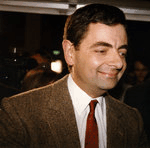

In [ ]:
question = "Who is Rowan Atkinson?"
query = urllib.parse.quote_plus(f"{question}")
query_url = f"http://api.wolframalpha.com/v2/query?" \
            f"appid={appid}" \
            f"&input={query}" \
            f"&i={question}" \
            "&format=image,plaintext" \
            "&output=json"
r = requests.get(query_url).json()

#Use pod index 4 for Notable facts
data = r["queryresult"]["pods"][4]["subpods"][0]
plaintext = data["plaintext"]

print(f"{question}?\n{plaintext}.")

img_url =r["queryresult"]["pods"][2]['subpods'][0]['img']['src']

img_name = "search_image.jpg"
img_data = requests.get(img_url).content
with open(img_name, 'wb') as handler:
    handler.write(img_data)
    print(f"Searched Image Saved to {img_name}.")

display.Image("/content/search_image.jpg")